In [1]:
# cd("z:\\home\\Vandy\\code\\julia\\SLMTools\\examples")
cd("z:\\home\\Vandy\\code\\julia")
# using SLMTools
using Pkg
println("Current environment path: ", Pkg.project().path)
Pkg.activate("C:\\Users\\micha\\.julia\\environments\\v1.9\\Project.toml")
println("Current environment path: ", Pkg.project().path)

Current environment path: C:\Users\micha\.julia\environments\v1.9\Project.toml


Current environment path: C:\Users\micha\.julia\environments\v1.9\Project.toml


  Activating project at `C:\Users\micha\.julia\environments\v1.9`


(-16.0:0.03125:15.96875, -16.0:0.03125:15.96875)


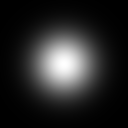

In [2]:
using SLMTools, Images, Statistics, Plots
N = 1024
# NSLM = 1024
# sz = (10, 10)
# sigma = 0.5
beam0 = lfGaussian(Intensity, (N, N), 5.0)
println(beam0.L)
dsbeam0 = downsample(beam0, 8) # Make a 8x downsampled image
p1 = look(dsbeam0)

(-15.890625:0.25:15.859375, -15.890625:0.25:15.859375)


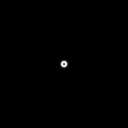

In [3]:
target = lfRing(Intensity, (N, N), 0.5, 0.25)
p2 = look(target)
dstarget = downsample(target, 8)
println(dstarget.L)
p3 = look(dstarget)

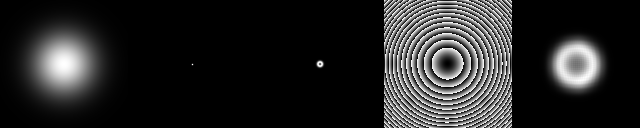

In [7]:
phi1 = otPhase(dsbeam0, dstarget, 0.0005)
beam_out = sft(sqrt.(dsbeam0.data) .* exp.(2pi * im * phi1.data)) .^ 2 |> nabs;
beam0_out = sft(sqrt.(dsbeam0.data) .* exp.(0*2pi * im * phi1.data)) .^ 2 |> nabs;
LFout = LatticeField{Intensity}(beam_out, dsbeam0.L);
LF0out = LatticeField{Intensity}(beam0_out, dsbeam0.L);
p7 = look(dsbeam0, LF0out, dstarget, phi1, LFout)